%% [markdown]<br>
### Import necessary packages<br>


%%

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%%

In [2]:
df = pd.read_csv('data/housing.csv')
print('Shape: ', df.shape)
print(df.head())

Shape:  (1460, 63)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition

%% [markdown]<br>
### Display the data types of the dataframe

%%

In [3]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 63, dtype: object


%% [markdown]<br>
## Constant features<br>
### Split the data in to train, test split. In this housing data, "SalePrice" is the dependent/target feature.

%%

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['SalePrice'], axis=1), df['SalePrice'], test_size=0.3, random_state=0)

%% [markdown]<br>
### Select the numeric columns only

%%

In [5]:
numeric_X_train = X_train[X_train.select_dtypes([np.number]).columns]

In [6]:
print(len(numeric_X_train.columns))
print(numeric_X_train.columns)
print(numeric_X_train.head())

35
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
64      65          60    70.049958     9375            7            5   
682    683         120    70.049958     2887            6            5   
960    961          20    50.000000     7207            5            7   
1384  1385          50    60.000000     9060            6            5   
1100  1101          30    60.000000     8400            2            5 

%% [markdown]<br>
### Use VarianceThreshold feature selector to select the feature which have more<br>
### variance i.e more than zero

%%

In [7]:
from sklearn.feature_selection import VarianceThreshold

In [8]:
vs_constants = VarianceThreshold(threshold=0)
vs_constants.fit(numeric_X_train)

VarianceThreshold(threshold=0)

In [9]:
print(len(vs_constants.get_support()))
print(vs_constants.get_support())

35
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


%% [markdown]<br>
### Get all the selected column names

%%

In [10]:
constant_columns = [column for column in numeric_X_train 
                    if column not in numeric_X_train.columns[vs_constants.get_support()]]
#
print('Lenght of X train columns: ', len(X_train.columns))
print('Lenght of numeric X train columns: ', len(numeric_X_train.columns))
print('Lenght of constant columns: ', len(constant_columns))

Lenght of X train columns:  62
Lenght of numeric X train columns:  35
Lenght of constant columns:  0


%%


<br>
for column in X_train.columns:<br>
    print(X_train[column].dtype)<br>
#<br>
print(X_train['LandContour'].unique())<br>
print(len(X_train['LandContour'].unique()))<br>


In [11]:
constant_categorical_columns = [column for column in X_train.columns
                                if (X_train[column].dtype == "object" and  len(X_train[column].unique()) == 1)]
print("Constant categorical columns:")
print(constant_categorical_columns)
#
all_constant_columns = constant_columns + constant_categorical_columns
print("All Constant columns:")
print(all_constant_columns)

Constant categorical columns:
[]
All Constant columns:
[]


%% [markdown]<br>
### Drop all constant columns from X_train and X_text

%%

In [12]:
X_train.drop(labels=all_constant_columns, axis=1, inplace=True)
X_test.drop(labels=all_constant_columns, axis=1, inplace=True)

%% [markdown]<br>
## Quasi Constant Features

%%

In [13]:
threshold = 0.98
quasi_constant_features = []
#
for feature in X_train.columns:   
    value_counts = X_train[feature].value_counts()
    print('Value counts for', feature)
    print(value_counts)
    #Calculate the ratio
    value_percentage = (value_counts / np.float64(len(X_train))).sort_values(ascending=False)
    print('Value percentage:')
    print(value_percentage)
    predominant = value_percentage.values[0]
    #
    #
    if(predominant >= threshold):
        quasi_constant_features.append(feature)
    
    #
print('Quasi constant features:')
print(quasi_constant_features)

Shape, dtype: int64
Value percentage:
Reg    0.628180
IR1    0.337573
IR2    0.028376
IR3    0.005871
Name: LotShape, dtype: float64
Value counts for LandContour
Lvl    923
Bnk     44
HLS     28
Low     27
Name: LandContour, dtype: int64
Value percentage:
Lvl    0.903131
Bnk    0.043053
HLS    0.027397
Low    0.026419
Name: LandContour, dtype: float64
Value counts for Utilities
AllPub    1021
NoSeWa       1
Name: Utilities, dtype: int64
Value percentage:
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64
Value counts for LotConfig
Inside     741
Corner     181
CulDSac     68
FR2         31
FR3          1
Name: LotConfig, dtype: int64
Value percentage:
Inside     0.725049
Corner     0.177104
CulDSac    0.066536
FR2        0.030333
FR3        0.000978
Name: LotConfig, dtype: float64
Value counts for LandSlope
Gtl    962
Mod     50
Sev     10
Name: LandSlope, dtype: int64
Value percentage:
Gtl    0.941292
Mod    0.048924
Sev    0.009785
Name: LandSlope, dtype: float64
V

%% [markdown]<br>
### Drop the Quasi constant features for X_train and X_test

%%

In [14]:
X_train.drop(labels=quasi_constant_features, axis=1, inplace=True)
X_test.drop(labels=quasi_constant_features, axis=1, inplace=True)

%% [markdown]<br>
## Duplicated features

%%

In [15]:
train_features_T = X_train.T
#
print(train_features_T)
# print the number of duplicated features
print(train_features_T.duplicated())
# select the duplicated columns
duplicated_columns = train_features_T[train_features_T.duplicated()].index.values
#
#
X_train.drop(labels=duplicated_columns, axis=1, inplace=True)
X_test.drop(labels=duplicated_columns, axis=1, inplace=True)

                    64         682      960      1384     1100     416   \
Id                    65        683      961     1385     1101      417   
MSSubClass            60        120       20       50       30       60   
MSZoning              RL         RL       RL       RL       RL       RL   
LotFrontage    70.049958  70.049958     50.0     60.0     60.0     74.0   
LotArea             9375       2887     7207     9060     8400     7844   
LotShape             Reg        Reg      IR1      Reg      Reg      Reg   
LandContour          Lvl        HLS      Lvl      Lvl      Bnk      Lvl   
LotConfig         Inside     Inside   Inside   Inside   Inside   Inside   
LandSlope            Gtl        Gtl      Gtl      Gtl      Gtl      Gtl   
Neighborhood     CollgCr    ClearCr  BrkSide  Edwards    SWISU   Sawyer   
Condition1          Norm       Norm     Norm     Norm     Norm     Norm   
BldgType            1Fam       1Fam     1Fam     1Fam     1Fam     1Fam   
HouseStyle        2Story 

%% [markdown]<br>
## Correlation Methods

%%

<AxesSubplot:>

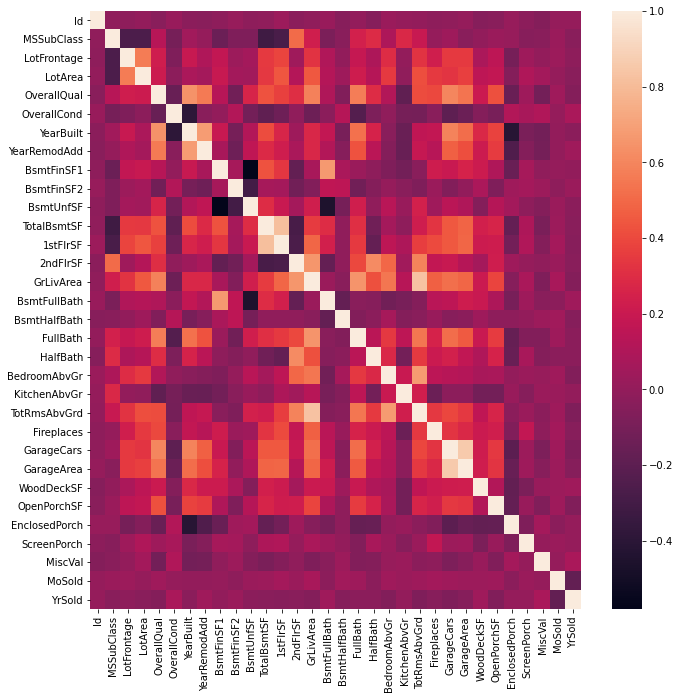

In [16]:
correlated_features = set()
correlation_matrix = X_train.corr(method="spearman")
#correlation_matrix = X_train.corr(method="kendall")
#correlation_matrix = X_train.corr()  # Default method is Pearson
#
plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix)

%%

In [17]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)

In [18]:
print(correlated_features)

{'TotRmsAbvGrd', '1stFlrSF', 'GarageArea'}


%% [markdown]<br>
### Drop highly correlated columns

%%

In [19]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

%% [markdown]<br>
## Statistical Measures

%%

In [20]:
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

%% [markdown]<br>
### Mutual Information

%%<br>
Select the number of feature that to be retained

In [21]:
select_k = 10

Get the numerical features

In [22]:
numeric_X_train = X_train[X_train.select_dtypes([np.number]).columns]
 
# Create the SelectKBest with nutual infor stategy
selection = SelectKBest(score_func=mutual_info_classif, k=select_k).fit(numeric_X_train, y_train)

Display the retained features

In [23]:
print(len(numeric_X_train.columns))
print(len(selection.get_support()))
print(len(X_train.columns))
features = numeric_X_train.columns[selection.get_support()]
print(features)

29
29
53
Index(['OverallQual', 'OverallCond', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars'],
      dtype='object')


%% [markdown]<br>
### Chi-squared score

%%

In [24]:
select_k = 10
# Create the SelectKBest with Chi score
# selection = SelectKBest(score_func=chi2, k=select_k).fit(X_train, y_train)
# features = X_train.columns[selection.get_support()]
print(select_k)

10


%%